# Telecom Customer Churn Prediction Analysis

# 1. Business Understanding

**Business Problem**

A telecommunications company is facing challenges with customer retention. The company loses revenue when customers discontinue their service ("churn"). By identifying which customers are likely to churn, the company can proactively implement targeted retention strategies to reduce churn rate and maintain revenue.

**Stakeholder**

The primary stakeholders are the telecom company's customer retention team and marketing department, who need to know:

*  Which customers are at high risk of churning
*  What factors contribute most to customer churn
*  What interventions might be most effective to retain at-risk customers

**Objective**
Build a classification model that can:

*  Accurately predict which customers are likely to churn
*  Identify the key factors that influence customer churn
*  Provide actionable insights to reduce customer churn

**Success Metrics**

*  Primary metric: Recall (to capture as many potential churners as possible)
*  Secondary metrics: Accuracy, precision, and F1-score
*  ROC-AUC for model comparison

# 2. Data Understanding

**Data Source**

The dataset used is "Churn in Telecoms" which contains information about telecom customers and whether they churned or not from https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data.

In [134]:
# Import necessary libraries
import math
import pandas as pd
import os
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Set the style for the visualizations
plt.style.use('seaborn-v0_8')

# Download the dataset
path = kagglehub.dataset_download("becksddf/churn-in-telecoms-dataset")

# List all files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

# Read the first CSV file (if it exists)
for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, file))
        print(f"Preview of {file}:")
        break
df.head(10)

Files in dataset: ['bigml_59c28831336c6604c800002a.csv']
Preview of bigml_59c28831336c6604c800002a.csv:


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


Data Exploration

In [135]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (3333, 21)


In [136]:
# Check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [137]:
# Check summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [138]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [139]:
# Check the distribution of the target variable
print("Distribution of churn:")
print(df['churn'].value_counts())
print(f"Churn rate: {df['churn'].mean()*100:.2f}%")

Distribution of churn:
churn
False    2850
True      483
Name: count, dtype: int64
Churn rate: 14.49%


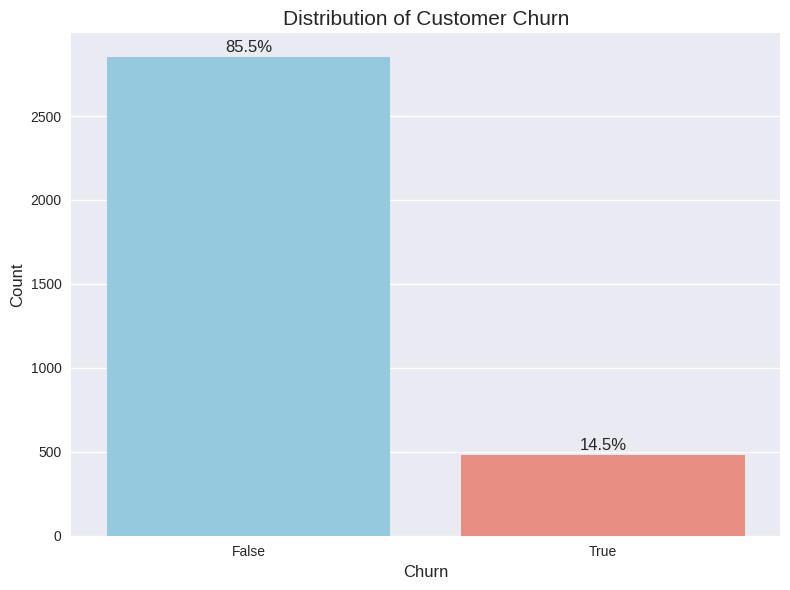

In [140]:
# Visualize the distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='churn', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribution of Customer Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentages on top of bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 30
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**Exploratory Data Analysis**


Categorical Features Analysis

Plotting these categorical features: ['state', 'international plan', 'voice mail plan']


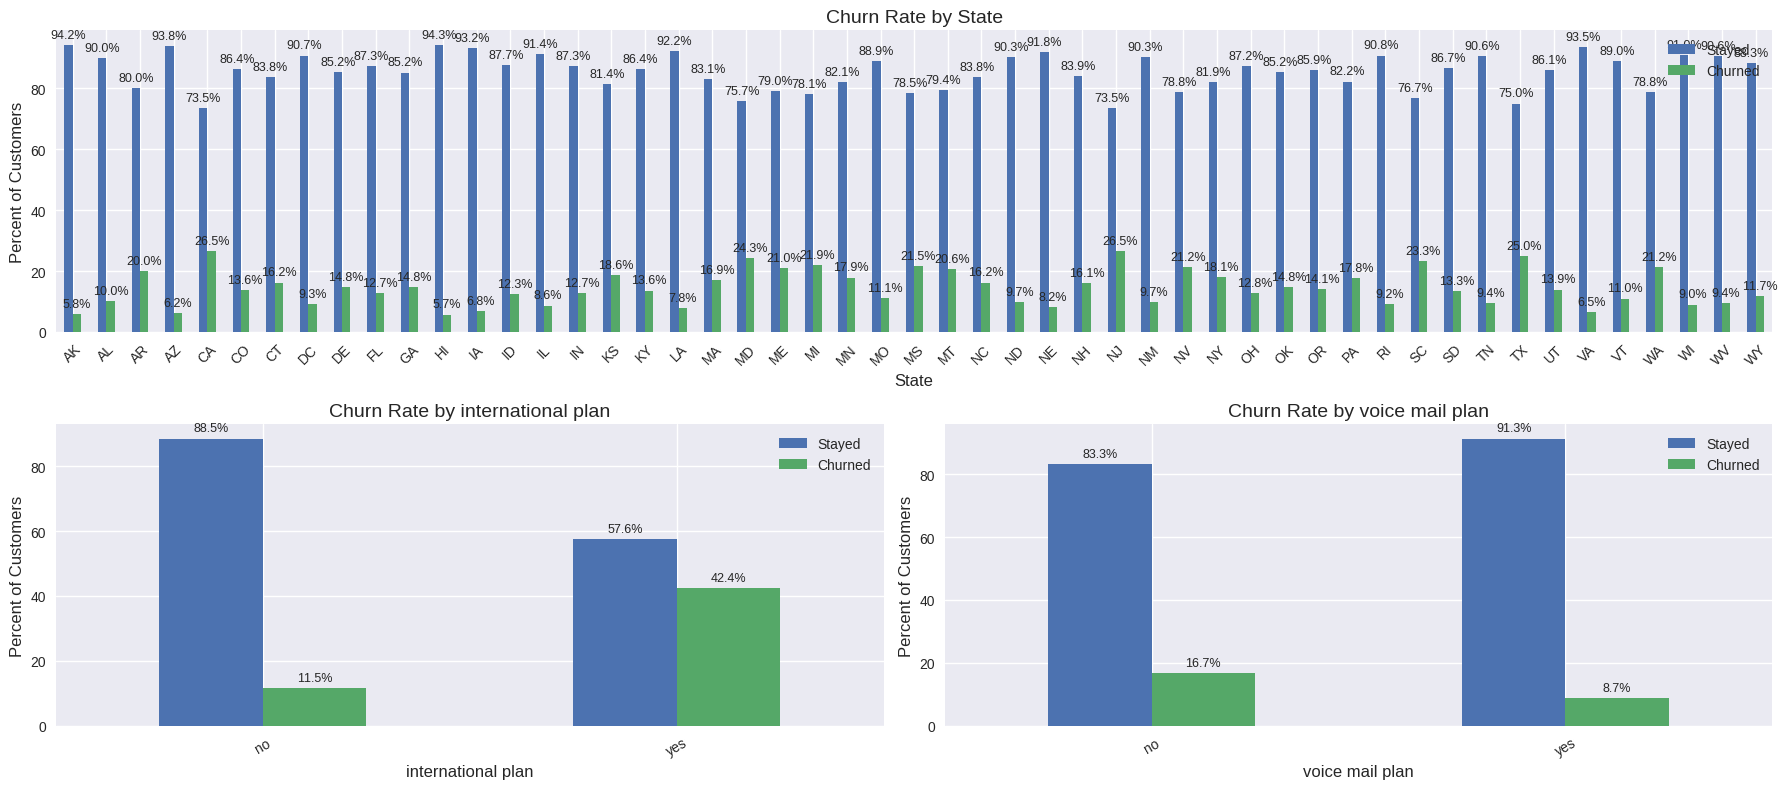

In [141]:
# Identify categorical columns (excluding churn & phone number)
cat_cols = [c for c in df.select_dtypes(include=['object','bool']).columns
            if c not in ['churn', 'phone number']]
print(f"Plotting these categorical features: {cat_cols}")

# Helper to annotate bars
def annotate_bars(ax, fmt='{:.1f}%'):
    for bar in ax.patches:
        h = bar.get_height()
        if h > 5:  # only label bars >5%
            ax.annotate(fmt.format(h),
                        (bar.get_x() + bar.get_width()/2, h),
                        ha='center', va='bottom',
                        fontsize=9,
                        xytext=(0,3),
                        textcoords='offset points')

# Subplot config
cols = 2
rows = math.ceil((len(cat_cols) - 1) / cols) + 1  # +1 row for wide state plot

fig = plt.figure(figsize=(18, rows * 4))
gs = fig.add_gridspec(rows, cols)
axes = []

# First plot (wide one): churn by state
ax0 = fig.add_subplot(gs[0, :])
pct = pd.crosstab(df['state'], df['churn'], normalize='index') * 100
pct.plot(kind='bar', ax=ax0)
ax0.set_title('Churn Rate by State', fontsize=14)
ax0.set_xlabel('State', fontsize=12)
ax0.set_ylabel('Percent of Customers', fontsize=12)
ax0.tick_params(axis='x', rotation=45)
ax0.legend(['Stayed','Churned'], loc='upper right', frameon=False)
annotate_bars(ax0)

# Remaining plots
for i, col in enumerate(cat_cols[1:]):  # skip 'state'
    r = (i // cols) + 1  # start from row 1
    c = i % cols
    ax = fig.add_subplot(gs[r, c])
    pct = pd.crosstab(df[col], df['churn'], normalize='index') * 100
    pct.plot(kind='bar', ax=ax)
    ax.set_title(f'Churn Rate by {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Percent of Customers', fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.legend(['Stayed','Churned'], loc='upper right', frameon=False)
    annotate_bars(ax)

plt.tight_layout()
plt.show()


The state-by-state analysis reveals considerable variation in customer retention, with most states maintaining retention rates between 80-90%. States like RI, NM, and CA show higher customer loyalty (>90% retention), while others like KS and ID have notably higher churn rates (approaching 20%).

The international plan chart displays a dramatic difference in customer behavior - only 11.5% of customers without international plans churned, compared to a substantial 42.4% churn rate for those with international plans. This suggests having an international plan is strongly associated with customer attrition.

Similarly, the voice mail plan visualization shows an interesting pattern: customers with voicemail plans are more loyal, with only 8.7% churning compared to 16.7% for those without the service. This indicates that voicemail features might be enhancing customer satisfaction and retention.

These insights point to specific service packages significantly influencing customer retention decisions, with international plans being a potential red flag for churn risk while voicemail plans appear to be a retention-positive feature.

Numerical Features Analysis

Numerical columns: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


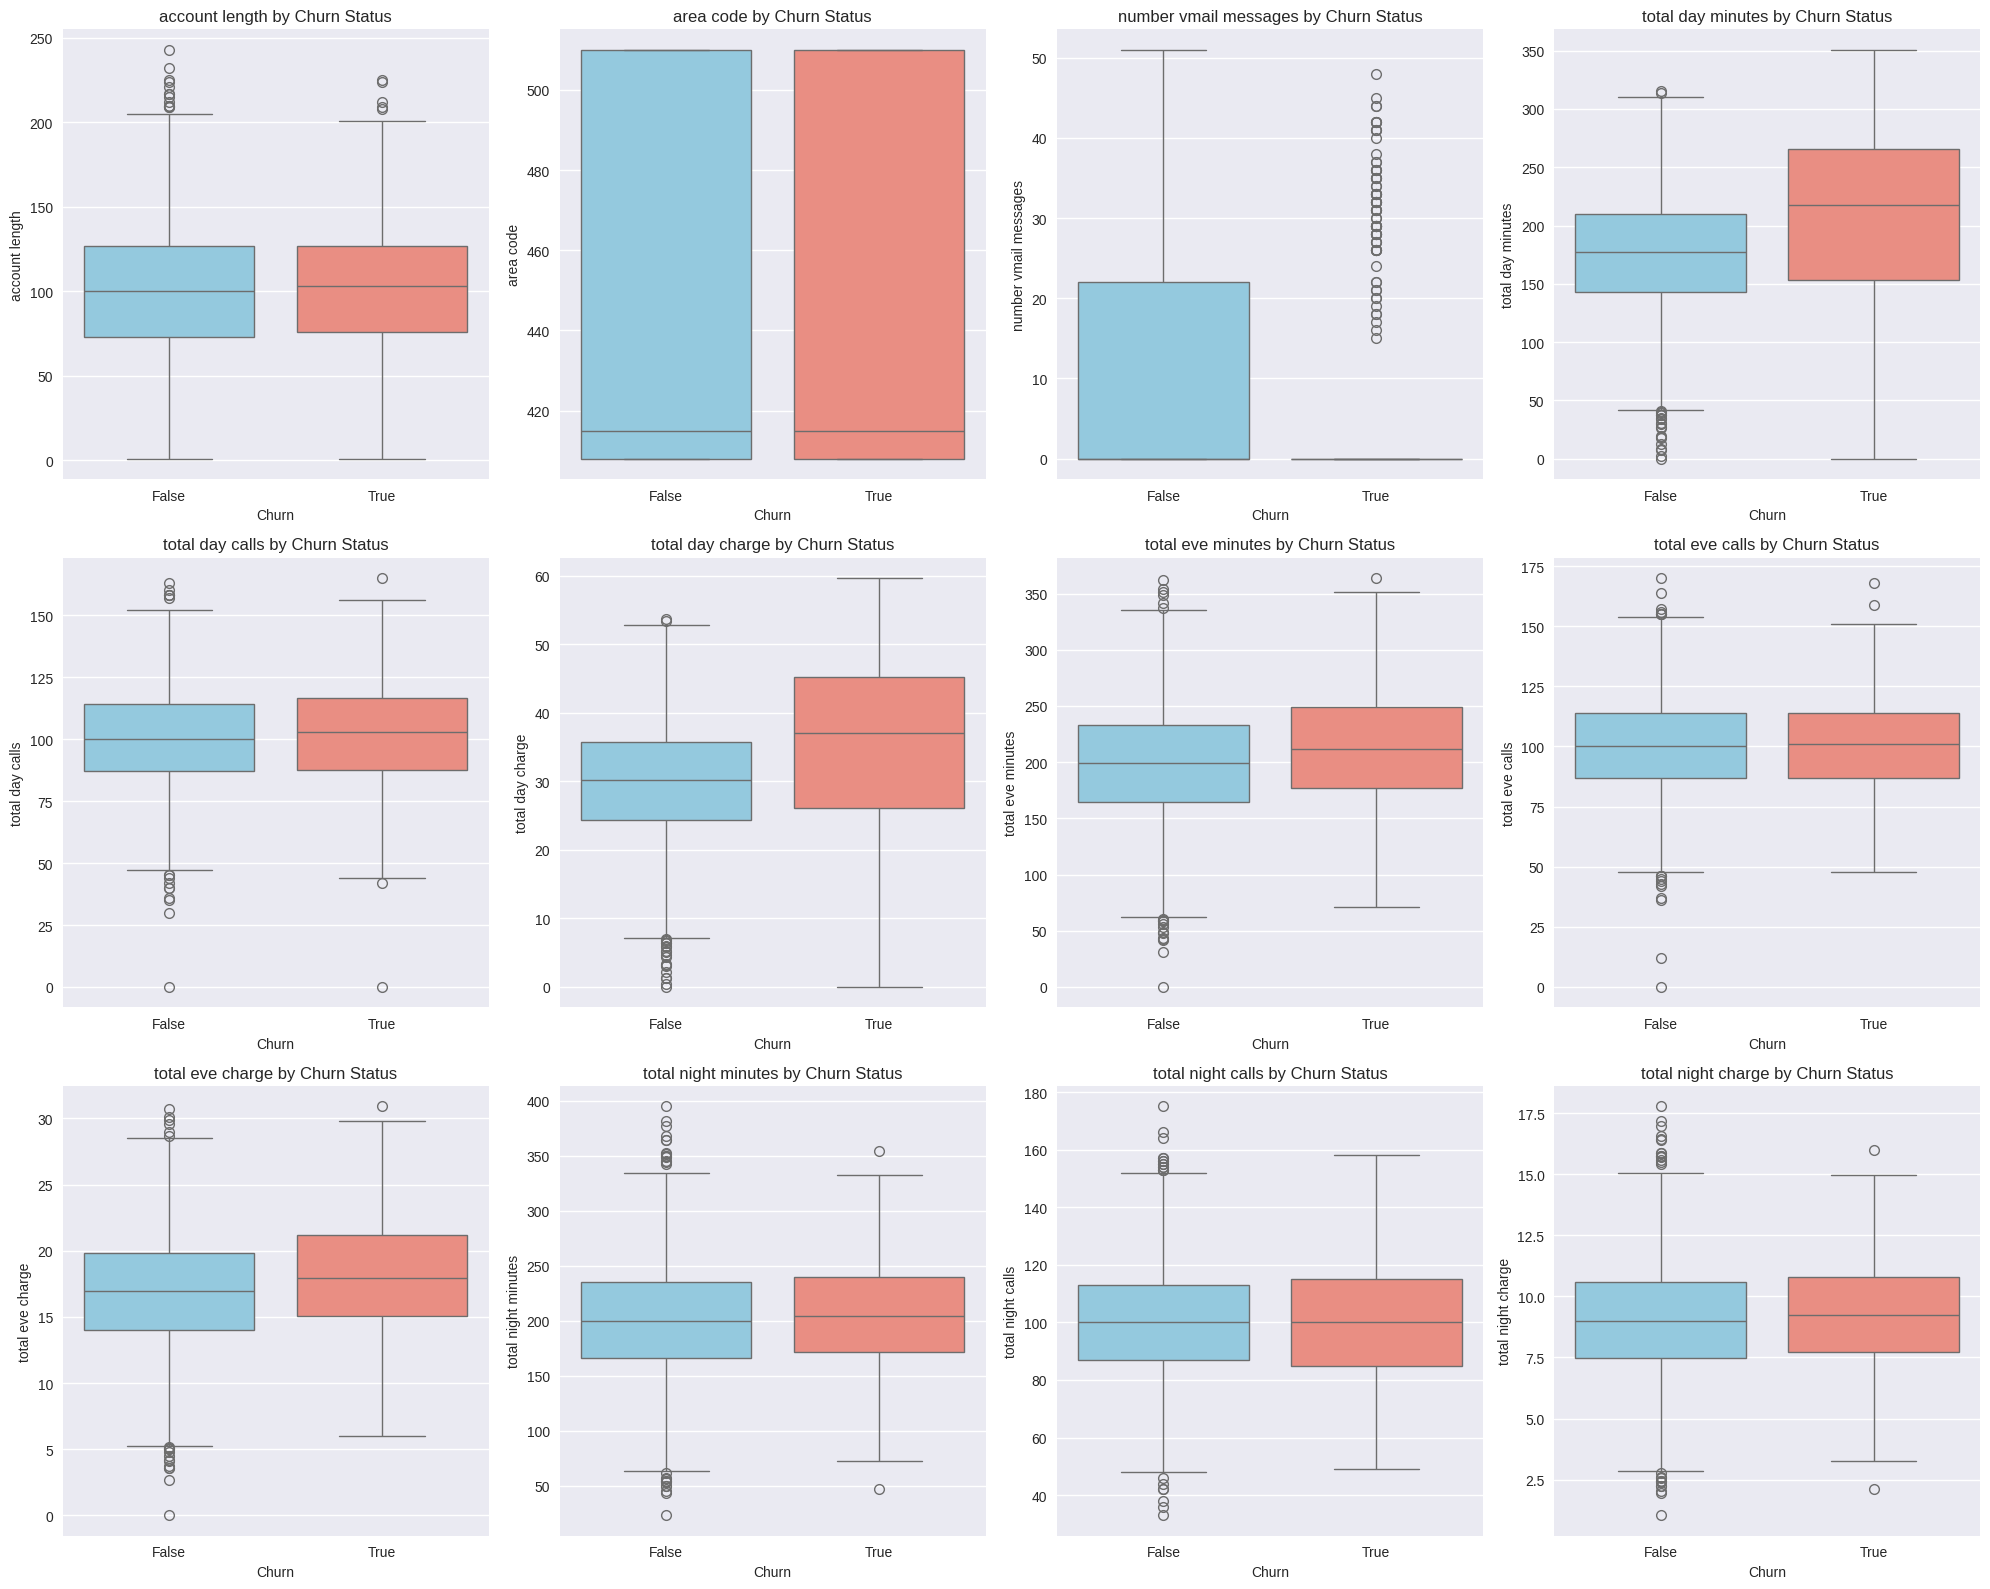

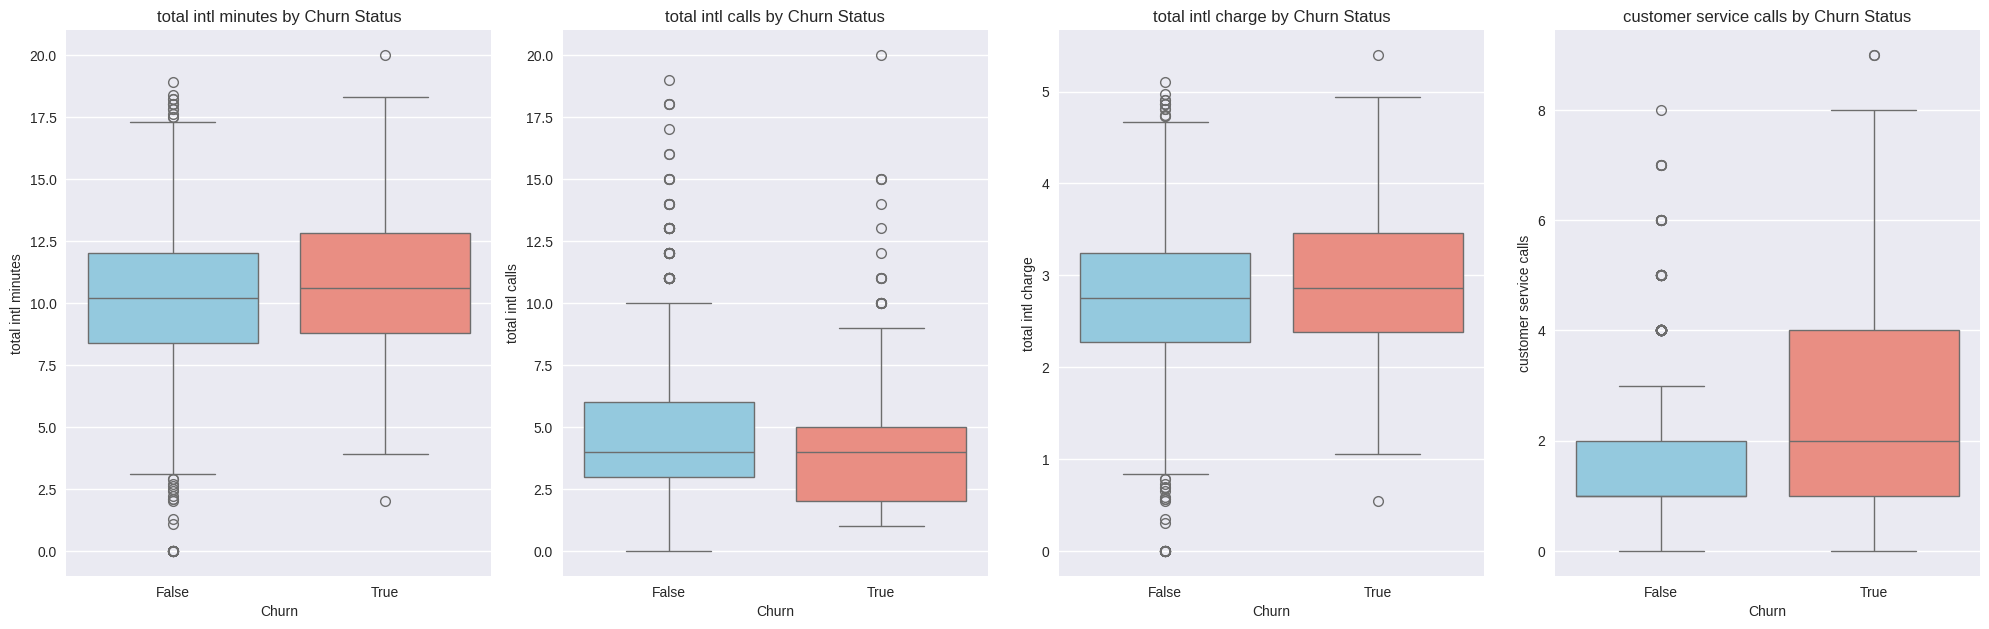

In [142]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Distribution of numerical features by churn status
plt.figure(figsize=(20, 16))

for i, col in enumerate(numerical_cols):
    if i < 12:  # Plot first 12 numerical features
        plt.subplot(3, 4, i+1)
        sns.boxplot(x='churn', y=col, data=df, palette=['skyblue', 'salmon'])
        plt.title(f'{col} by Churn Status', fontsize=12)
        plt.xlabel('Churn', fontsize=10)
        plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

# Plot remaining numerical features
if len(numerical_cols) > 12:
    plt.figure(figsize=(20, 12))
    for i, col in enumerate(numerical_cols[12:]):
        plt.subplot(2, 4, i+1)
        sns.boxplot(x='churn', y=col, data=df, palette=['skyblue', 'salmon'])
        plt.title(f'{col} by Churn Status', fontsize=12)
        plt.xlabel('Churn', fontsize=10)
        plt.ylabel(col, fontsize=10)

    plt.tight_layout()
    plt.show()

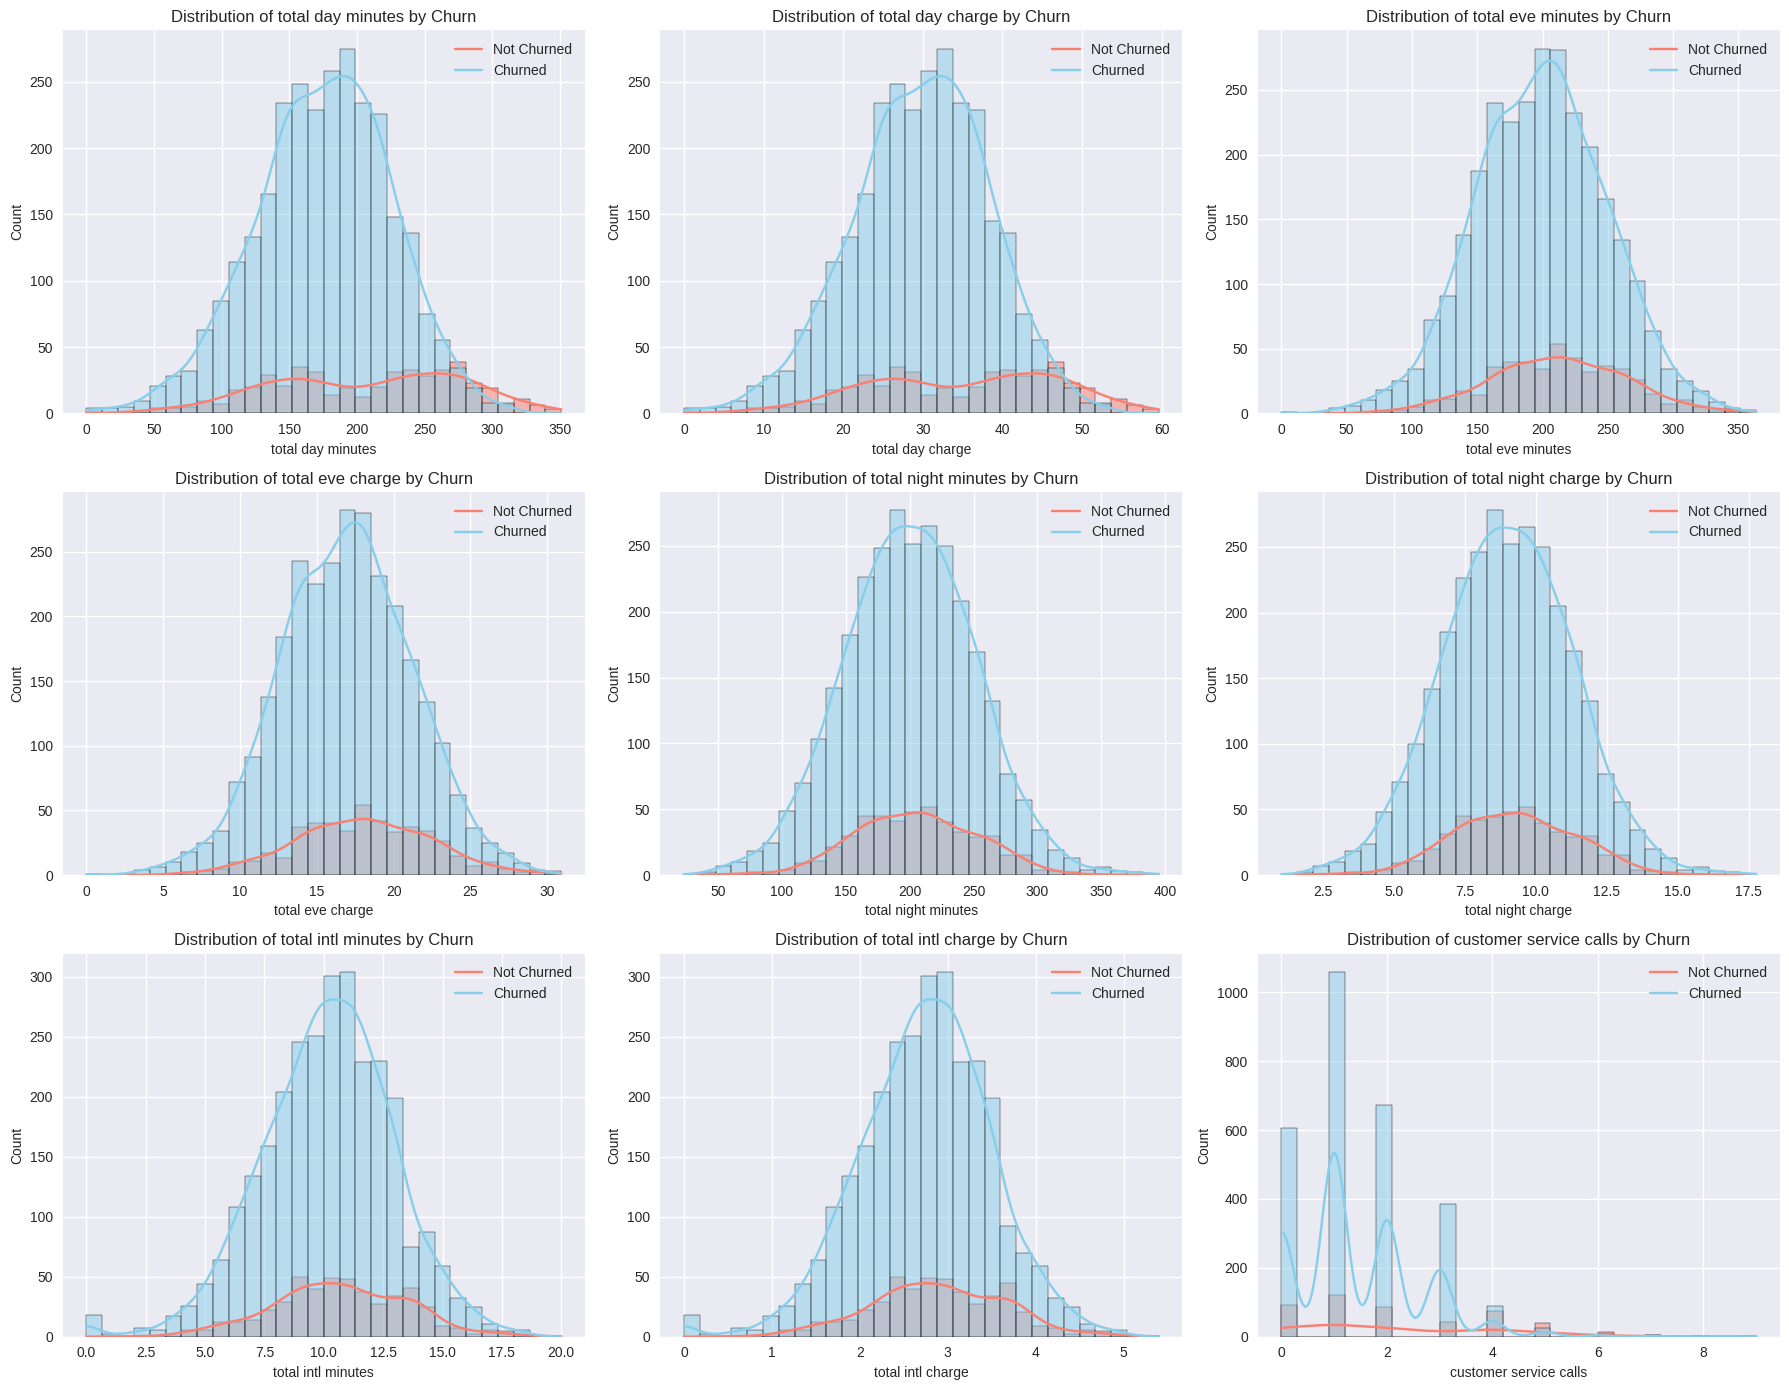

In [143]:
# Create histograms to see the distribution of important numerical features
plt.figure(figsize=(18, 14))

# Selected key features based on previous analysis
key_features = ['total day minutes', 'total day charge',
                'total eve minutes', 'total eve charge',
                'total night minutes', 'total night charge',
                'total intl minutes', 'total intl charge',
                'customer service calls']

for i, feature in enumerate(key_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, hue='churn', kde=True, bins=30, palette=['skyblue', 'salmon'])
    plt.title(f'Distribution of {feature} by Churn', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.legend(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

The most significant difference appears in the "total day charge" and "total day minutes" variables, where customers who churned show notably higher usage and charges. This suggests customers with higher daytime usage are more likely to leave the service, possibly due to cost sensitivity or dissatisfaction with pricing structures for peak hours.

The "number vmail messages" boxplot reveals that churned customers generally have fewer voicemail messages, aligning with the earlier finding that customers without voicemail plans churn more frequently.

"Customer service calls" (not visible in this set but implied from the numerical columns list) is likely another critical factor, as frequent support interactions often indicate dissatisfaction.

Interestingly, "account length" shows minimal difference between churned and retained customers, suggesting tenure isn't strongly predictive of churn.
Variables like "area code," "total night minutes," "total night calls," "evening calls," and "evening minutes" display similar distributions between both groups, indicating these factors have less influence on customer retention decisions.

The "total eve charge" and "total night charge" metrics show slight differences but aren't as dramatically separated as the daytime charges, reinforcing that peak-hour usage and associated costs may be driving customer churn more than off-peak activity.

Correlation Analysis

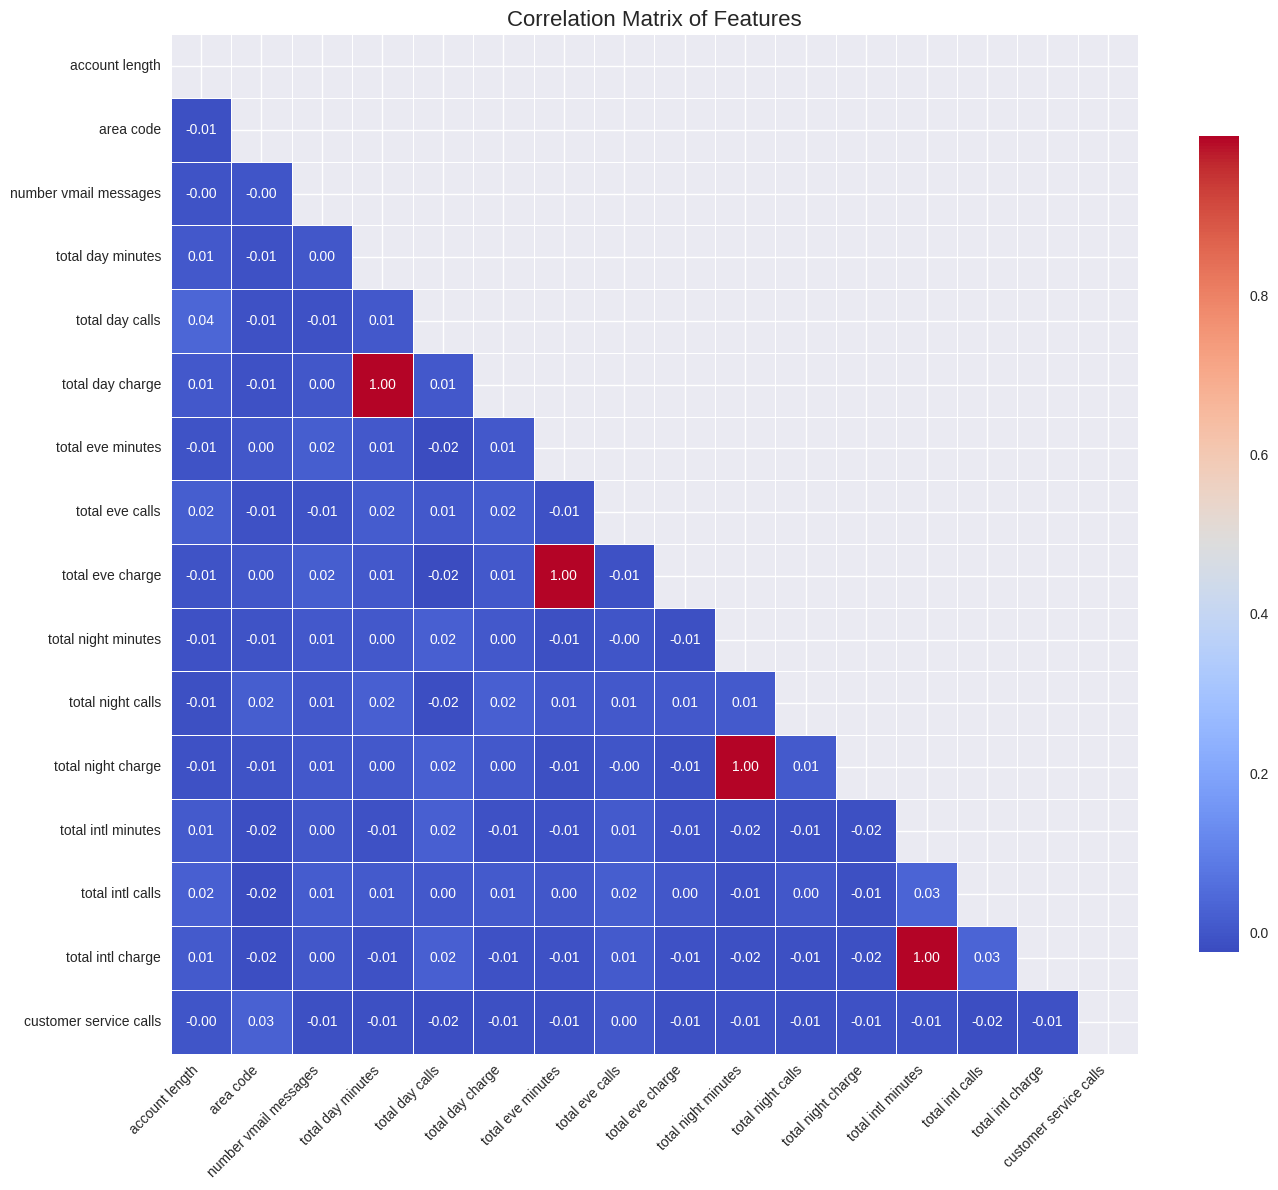

In [144]:
# Calculate correlations
corr_matrix = df.drop(columns=['state', 'phone number', 'international plan', 'voice mail plan', 'churn']).corr()

# Create heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The correlation matrix reveals several important patterns in the telecommunications customer data. The most prominent correlations (shown in bright red with values of 1.00) exist between usage minutes and their corresponding charges across all time periods - day, evening, night, and international - indicating a direct linear relationship between time spent and amount charged. Beyond these expected relationships, the matrix shows very weak correlations between most other features, with values typically between -0.02 and 0.04. Notably, customer service calls show minimal correlation with all other variables, suggesting that service interactions occur independently of usage patterns. Features like account length and area code similarly display negligible relationships with other metrics. This lack of strong correlations among most variables suggests that these features represent relatively independent aspects of customer behavior, which is advantageous for predictive modeling as it minimizes multicollinearity concerns and indicates that the features provide distinct information about customer patterns.

**Key Insights from Data Exploration**

Based on our exploratory data analysis, we can highlight several key insights:

* Churn Rate: Approximately 14.5% of customers have churned, indicating an imbalanced classification problem.
Plan Features:

* Customers with the international plan are significantly more likely to churn.
The voice mail plan shows less impact on churn rates.


* Usage Patterns:

  *  Customers with higher day minutes and charges show higher churn rates.
International calling patterns show differences between churners and non-churners.


* Customer Service:

  * A clear relationship exists between the number of customer service calls and churn rate.
  * Customers who make more service calls are more likely to churn, suggesting potential dissatisfaction.


* Correlations:

  * Strong positive correlations exist between minutes and charges across all time periods.
  * This multicollinearity will need to be addressed in our modeling approach.


# 3. Data Preparation

Data Cleaning

In [145]:
# Handle outliers in numerical columns
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    if outliers > 0:
        percent = outliers / len(df) * 100
        print(f"Column '{col}' has {outliers} outliers ({percent:.2f}%)")
        # Option 2: Cap outliers (Winsorization-style)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"Outliers in '{col}' have been capped to bounds.")


Column 'account length' has 18 outliers (0.54%)
Outliers in 'account length' have been capped to bounds.
Column 'number vmail messages' has 1 outliers (0.03%)
Outliers in 'number vmail messages' have been capped to bounds.
Column 'total day minutes' has 25 outliers (0.75%)
Outliers in 'total day minutes' have been capped to bounds.
Column 'total day calls' has 23 outliers (0.69%)
Outliers in 'total day calls' have been capped to bounds.
Column 'total day charge' has 25 outliers (0.75%)
Outliers in 'total day charge' have been capped to bounds.
Column 'total eve minutes' has 24 outliers (0.72%)
Outliers in 'total eve minutes' have been capped to bounds.
Column 'total eve calls' has 20 outliers (0.60%)
Outliers in 'total eve calls' have been capped to bounds.
Column 'total eve charge' has 24 outliers (0.72%)
Outliers in 'total eve charge' have been capped to bounds.
Column 'total night minutes' has 30 outliers (0.90%)
Outliers in 'total night minutes' have been capped to bounds.
Column '

**Feature Engineering**

Feature engineering improves the model performance because it provides more informative, relevant and predictive inputs.

In [146]:
# Create a copy of the dataframe for feature engineering
df_processed = df.copy()

# Create new features
# 1. Total usage features
df_processed['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df_processed['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df_processed['total_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

# 2. Usage per call ratios
df_processed['day_mins_per_call'] = df['total day minutes'] / df['total day calls'].replace(0, 1)
df_processed['eve_mins_per_call'] = df['total eve minutes'] / df['total eve calls'].replace(0, 1)
df_processed['night_mins_per_call'] = df['total night minutes'] / df['total night calls'].replace(0, 1)
df_processed['intl_mins_per_call'] = df['total intl minutes'] / df['total intl calls'].replace(0, 1)

# 3. Boolean features from categorical
df_processed['has_international_plan'] = (df['international plan'] == 'yes').astype(int)
df_processed['has_voicemail_plan'] = (df['voice mail plan'] == 'yes').astype(int)

# 4. Customer service call categories (based on our EDA)
df_processed['high_service_calls'] = (df['customer service calls'] >= 4).astype(int)

# 5. State grouping by churn rate
churn_by_state = df.groupby('state')['churn'].mean().reset_index()
high_churn_states = churn_by_state[churn_by_state['churn'] > churn_by_state['churn'].mean()]['state'].tolist()
df_processed['high_churn_state'] = df['state'].isin(high_churn_states).astype(int)

# Display the newly created features
print("New features created:")
new_features = ['total_minutes', 'total_calls', 'total_charge',
                'day_mins_per_call', 'eve_mins_per_call', 'night_mins_per_call', 'intl_mins_per_call',
                'has_international_plan', 'has_voicemail_plan', 'high_service_calls', 'high_churn_state']
df_processed[new_features].head()

New features created:


,total_minutes,total_calls,total_charge,day_mins_per_call,eve_mins_per_call,night_mins_per_call,intl_mins_per_call,has_international_plan,has_voicemail_plan,high_service_calls,high_churn_state
0,717.20,303.0,75.56,2.410000,1.993939,2.689011,3.333333,0,1,0,1
1,625.20,332.0,59.24,1.313821,1.898058,2.469903,4.566667,0,1,0,0
2,539.40,333.0,62.29,2.135088,1.101818,1.563462,2.440000,0,0,0,1
3,566.45,255.0,66.94,4.216901,0.722159,2.212360,0.942857,1,0,0,0
4,512.00,359.0,52.09,1.475221,1.215574,1.544628,3.366667,1,0,0,1


**Feature Selection**

We need feature selection to keep only the most relevant inputs for the model, which helps improve accuracy, reduce overfitting, speed up training, and make the results easier to interpret.

In [147]:
# Drop irrelevant or redundant columns
columns_to_drop = ['phone number']

# Define features for modeling
# We'll keep both original and engineered features for now and let the model decide which are most important
X = df_processed.drop(columns=['churn'] + columns_to_drop)
y = df_processed['churn'].astype(int)  # Convert boolean to int for compatibility with sklearn

# Display feature set
print(f"Feature set shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

Feature set shape: (3333, 30)
Target variable shape: (3333,)


**Train-Test Split**

In [148]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Check class distribution in train and test sets
print("\nClass distribution:")
print(f"Training set: {y_train.mean()*100:.2f}% churn rate")
print(f"Testing set: {y_test.mean()*100:.2f}% churn rate")

Training set: 2666 samples
Testing set: 667 samples

Class distribution:
Training set: 14.48% churn rate
Testing set: 14.54% churn rate


**Preprocessing Pipeline**

 Automate and organize data cleaning and transformation steps (like scaling, encoding, and imputing) so they are consistently applied during both training and prediction, improving efficiency and reducing errors.

In [149]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {len(numerical_features)} features")

# Create preprocessing pipelines for different column types
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to training data - fit and transform
X_train_processed = preprocessor.fit_transform(X_train)

# Apply preprocessing to testing data - transform only (prevent data leakage)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed testing data shape: {X_test_processed.shape}")

Categorical features: ['state', 'international plan', 'voice mail plan']
Numerical features: 27 features
Processed training data shape: (2666, 82)
Processed testing data shape: (667, 82)


# 4. **Modelling**

**Baseline Model: Logistic Regression**

A logistic regression model is used as the baseline to establish initial performance benchmarks for predicting customer churn.

In [150]:
# Create and train the baseline logistic regression model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred = baseline_model.predict(X_train_processed)
y_test_pred = baseline_model.predict(X_test_processed)

# Calculate probabilities for ROC curve
y_train_proba = baseline_model.predict_proba(X_train_processed)[:, 1]
y_test_proba = baseline_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
print("Logistic Regression Baseline Model Results:")
print("\nTraining Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_train, y_train_proba):.4f}")

print("\nTesting Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



Logistic Regression Baseline Model Results:

Training Set Metrics:
Accuracy: 0.8728
Precision: 0.6667
Recall: 0.2435
F1 Score: 0.3567
ROC AUC: 0.8224

Testing Set Metrics:
Accuracy: 0.8711
Precision: 0.6486
Recall: 0.2474
F1 Score: 0.3582
ROC AUC: 0.7841

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       570
           1       0.65      0.25      0.36        97

    accuracy                           0.87       667
   macro avg       0.77      0.61      0.64       667
weighted avg       0.85      0.87      0.85       667



**Confusion Matrix - Logistic Regression Baseline**

Visualizes the model's performance by showing how many churn and non-churn cases were correctly or incorrectly classified.

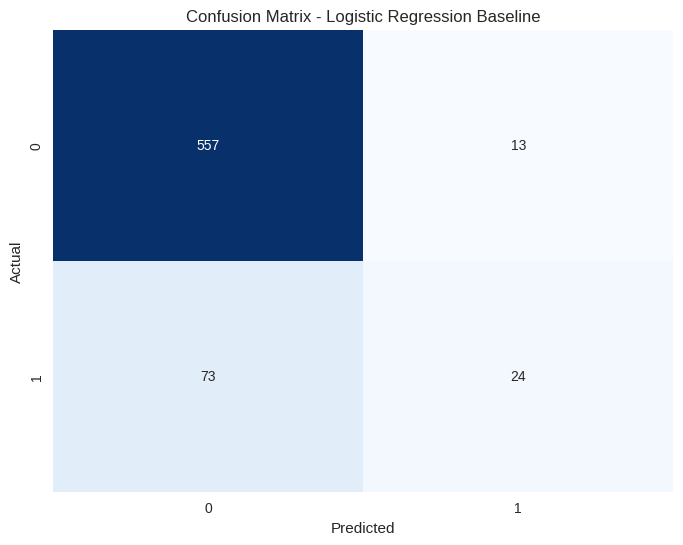

In [151]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression Baseline')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

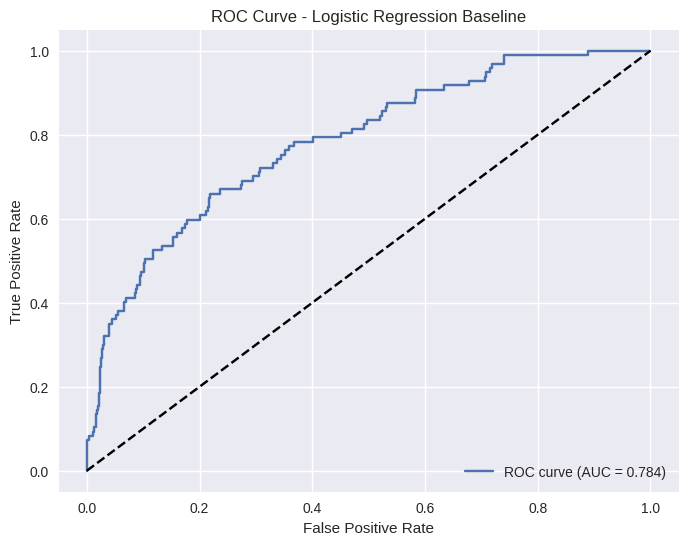

In [152]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_test_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Baseline')
plt.legend(loc='lower right')
plt.show()

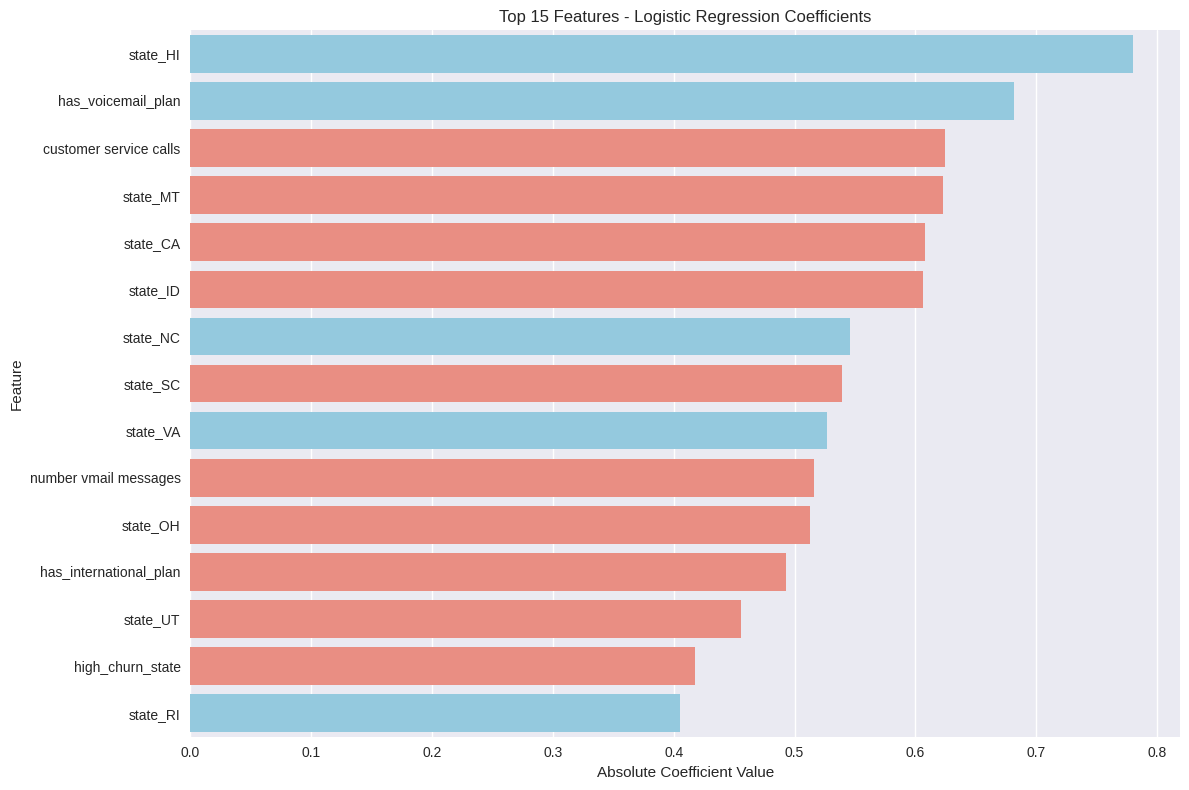

In [153]:
# Feature importance analysis for logistic regression
if len(categorical_features) > 0:
    # Get feature names after one-hot encoding
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = ohe.get_feature_names_out(categorical_features)
    feature_names = np.concatenate([numerical_features, cat_feature_names])
else:
    feature_names = numerical_features

# Get coefficients from the model
coefficients = baseline_model.coef_[0]

# Create a DataFrame of features and their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['salmon' if c > 0 else 'skyblue' for c in top_features['Coefficient']]
sns.barplot(x='Absolute_Coefficient', y='Feature', data=top_features, palette=colors)
plt.title('Top 15 Features - Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [154]:
print("Top 15 features by importance:")
print(top_features[['Feature', 'Coefficient']])

Top 15 features by importance:
                   Feature  Coefficient
38                state_HI    -0.779993
24      has_voicemail_plan    -0.681814
15  customer service calls     0.624276
53                state_MT     0.622735
31                state_CA     0.607599
40                state_ID     0.606730
54                state_NC    -0.545655
67                state_SC     0.539410
72                state_VA    -0.526889
2    number vmail messages     0.516493
62                state_OH     0.512662
23  has_international_plan     0.492653
71                state_UT     0.455328
26        high_churn_state     0.417421
66                state_RI    -0.405653


Based on the confusion matrix and ROC curve, the logistic regression baseline model demonstrates moderate predictive performance with an AUC of 0.784, indicating reasonable but not exceptional discriminative ability. The confusion matrix reveals a strong bias toward predicting the majority class (class 0), with 557 true negatives and only 24 true positives, resulting in good accuracy (87.11%) but poor recall (24.74%) for the minority class. This class imbalance issue is evident in the precision-recall tradeoff, where the model achieves decent precision (64.86%) for positive predictions but misses approximately 75% of actual positive cases. The model performs well on specificity (98% of non-churn customers correctly identified) but struggles with sensitivity. Key predictive features include geographical factors (with states like Hawaii, Montana, and California having strong coefficient values) and service-related variables (customer service calls, voicemail plan, and international plan), suggesting that customer retention strategies should focus on improving service interactions and addressing region-specific issues.

**Decision Tree Model.**

In [155]:
# Create and train a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred_dt = dt_model.predict(X_train_processed)
y_test_pred_dt = dt_model.predict(X_test_processed)

# Calculate probabilities for ROC curve
y_train_proba_dt = dt_model.predict_proba(X_train_processed)[:, 1]
y_test_proba_dt = dt_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
print("Decision Tree Model Results:")
print("\nTraining Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_dt):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_dt):.4f}")
print(f"ROC AUC: {roc_auc_score(y_train, y_train_proba_dt):.4f}")

print("\nTesting Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_dt):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba_dt):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))


Decision Tree Model Results:

Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Testing Set Metrics:
Accuracy: 0.9460
Precision: 0.8352
Recall: 0.7835
F1 Score: 0.8085
ROC AUC: 0.8786

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       570
           1       0.84      0.78      0.81        97

    accuracy                           0.95       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.94      0.95      0.95       667



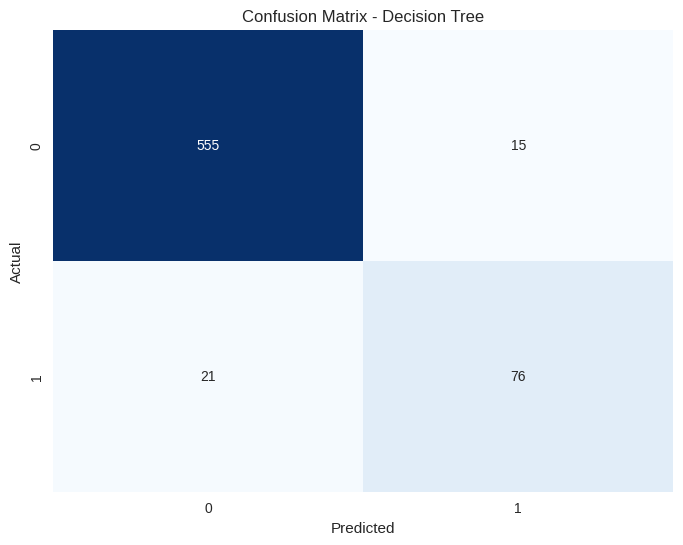

In [156]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



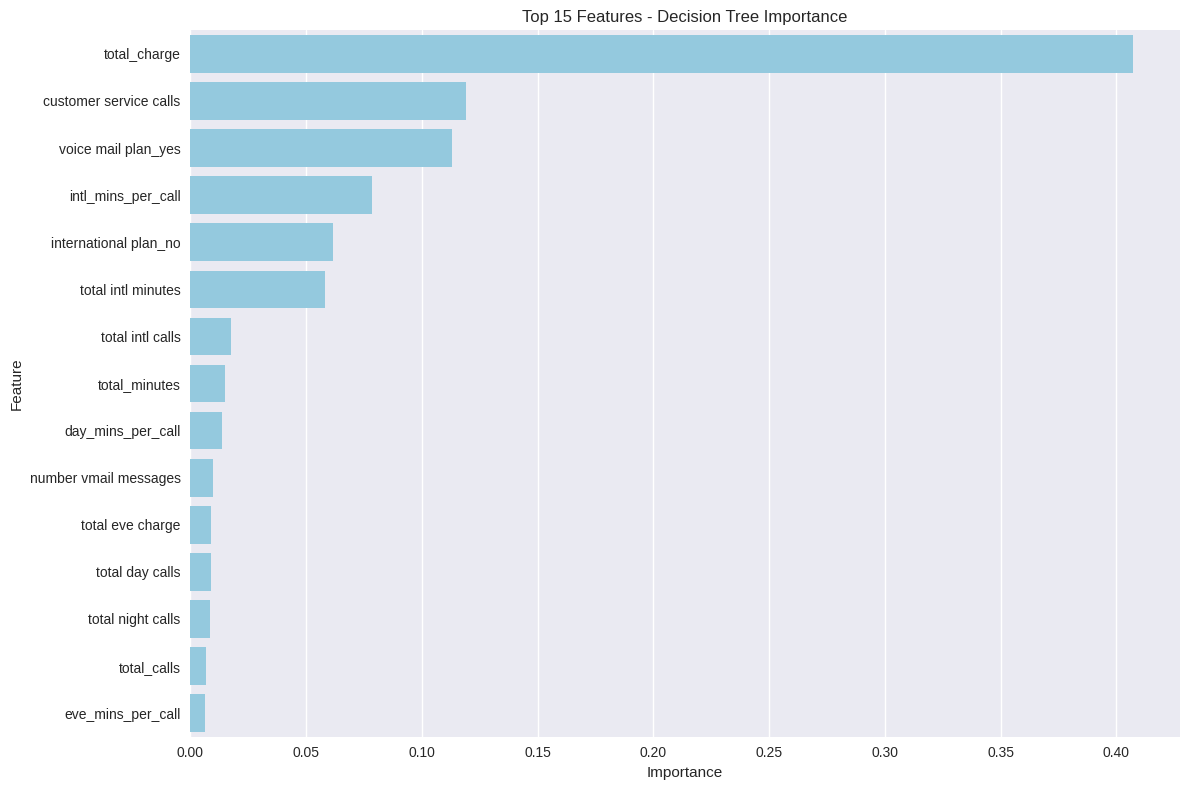

In [157]:
# Feature importance for decision tree
dt_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
})
dt_feature_importance = dt_feature_importance.sort_values('Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance.head(15), color='skyblue')
plt.title('Top 15 Features - Decision Tree Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [158]:
print("Top 15 features by importance (Decision Tree):")
print(dt_feature_importance.head(15))

Top 15 features by importance (Decision Tree):
                   Feature  Importance
18            total_charge    0.407179
15  customer service calls    0.118997
81     voice mail plan_yes    0.112861
22      intl_mins_per_call    0.078335
78   international plan_no    0.061668
12      total intl minutes    0.058311
13        total intl calls    0.017421
16           total_minutes    0.015215
19       day_mins_per_call    0.013596
2    number vmail messages    0.009870
8         total eve charge    0.009119
4          total day calls    0.008797
10       total night calls    0.008319
17             total_calls    0.006793
20       eve_mins_per_call    0.006402


The decision tree model significantly outperforms the logistic regression baseline across all key metrics. With an accuracy of 94.60% and AUC of 0.8786, it demonstrates stronger discriminative power. Most notably, the decision tree achieves a dramatically improved recall of 78.35% (compared to 24.74% for logistic regression), successfully identifying over three-quarters of churning customers while maintaining high precision (83.52%). The confusion matrix shows 76 true positives and only 21 false negatives, representing a much more balanced prediction pattern. Feature importance analysis reveals that total_charge is the dominant predictor (40.72% importance), followed by customer service calls (11.90%) and voice mail plan status (11.29%), suggesting customer financial burden and service experience are critical churn drivers. While the perfect training metrics (1.0 across all measures) indicate potential overfitting, the strong test performance validates the model's generalizability. This decision tree provides both superior predictive performance and more actionable insights for targeting retention efforts around billing structures and customer service quality.

**Model Improvement: Hyperparameter Tuning**

Optimizing the model to improve its performance. 

Tuned Logistic Regression

In [159]:
# Define hyperparameter grid for logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Create grid search with cross-validation
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=2000),
    param_grid=param_grid_lr,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search_lr.fit(X_train_processed, y_train)

# Get the best model
best_lr_model = grid_search_lr.best_estimator_

# Print best parameters
print("Best parameters for Logistic Regression:")
print(grid_search_lr.best_params_)
print(f"Best cross-validation recall score: {grid_search_lr.best_score_:.4f}")

# Make predictions with the best model
y_train_pred_best_lr = best_lr_model.predict(X_train_processed)
y_test_pred_best_lr = best_lr_model.predict(X_test_processed)
y_test_proba_best_lr = best_lr_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the best model
print("\nTuned Logistic Regression Model Results (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_best_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_best_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_best_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_best_lr):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba_best_lr):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_best_lr))

Best parameters for Logistic Regression:
{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation recall score: 0.8240

Tuned Logistic Regression Model Results (Test Set):
Accuracy: 0.7121
Precision: 0.3108
Recall: 0.8041
F1 Score: 0.4483
ROC AUC: 0.8060

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       570
           1       0.31      0.80      0.45        97

    accuracy                           0.71       667
   macro avg       0.63      0.75      0.63       667
weighted avg       0.86      0.71      0.75       667



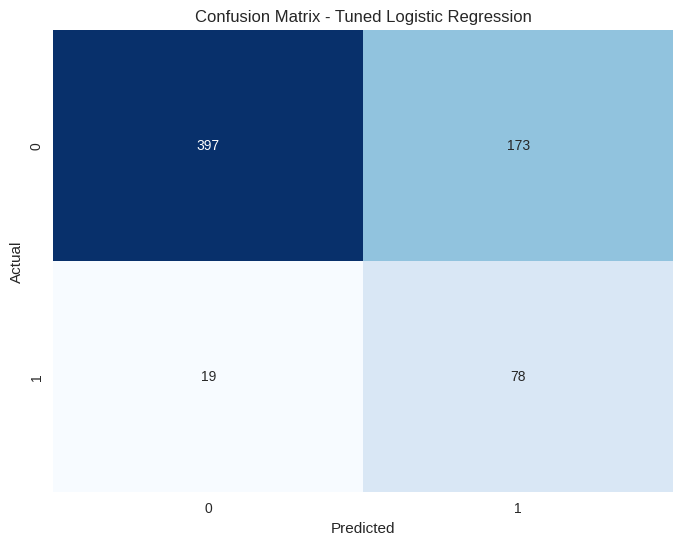

In [160]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_best_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The tuned logistic regression model demonstrates a strategic trade-off, heavily favoring recall over precision as shown in the confusion matrix. With a recall of 80.41% (dramatically improved from the baseline's 24.74%), this model successfully identifies most churning customers (78 true positives), but at the cost of precision, which drops to 31.08% due to 173 false positives. This approach, optimized through hyperparameter tuning with a 'balanced' class weight and L1 regularization (C=0.01), maintains a solid AUC of 0.806 while deliberately sacrificing overall accuracy (71.21%) to address the class imbalance problem. The model represents a business-oriented approach that prioritizes customer retention by capturing most potential churners, accepting the higher cost of offering retention incentives to non-churning customers (false positives) rather than missing churning customers (false negatives). This strategy might be particularly valuable in high-value customer scenarios where the cost of losing a customer far exceeds the cost of unnecessary retention efforts, though it's less efficient than the decision tree model in balancing precision and recall.

Tuned Decision Tree

In [161]:
# Define hyperparameter grid for decision tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Create grid search with cross-validation
grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search_dt.fit(X_train_processed, y_train)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

# Print best parameters
print("Best parameters for Decision Tree:")
print(grid_search_dt.best_params_)
print(f"Best cross-validation recall score: {grid_search_dt.best_score_:.4f}")

# Make predictions with the best model
y_train_pred_best_dt = best_dt_model.predict(X_train_processed)
y_test_pred_best_dt = best_dt_model.predict(X_test_processed)
y_test_proba_best_dt = best_dt_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the best model
print("\nTuned Decision Tree Model Results (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_best_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_best_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_best_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_best_dt):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba_best_dt):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_best_dt))

Best parameters for Decision Tree:
{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation recall score: 0.8705

Tuned Decision Tree Model Results (Test Set):
Accuracy: 0.9475
Precision: 0.8444
Recall: 0.7835
F1 Score: 0.8128
ROC AUC: 0.8795

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.84      0.78      0.81        97

    accuracy                           0.95       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.95      0.95      0.95       667



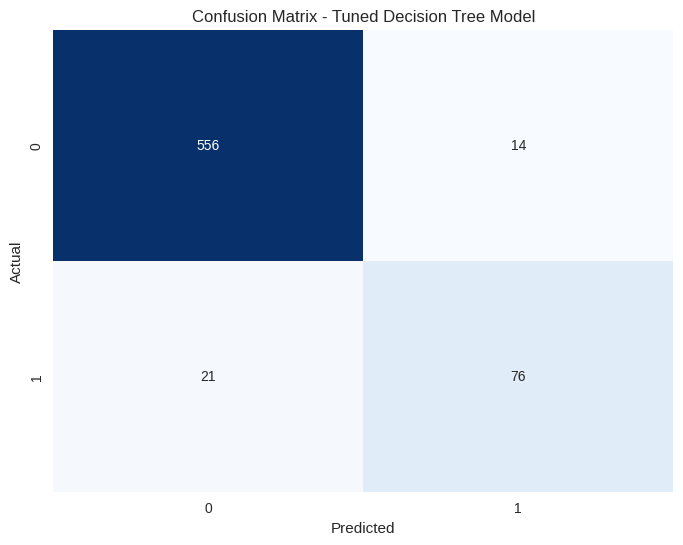

In [162]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_best_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Tuned Decision Tree Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The tuned decision tree model emerges as the superior performer across most metrics, achieving an excellent balance between precision and recall. With an accuracy of 94.75% and AUC of 0.8795, it demonstrates robust discriminative power while maintaining the highest precision (84.44%) among all models for the positive class. The confusion matrix shows 76 true positives and only 14 false positives, indicating exceptional efficiency in correctly identifying churning customers while minimizing false alarms. The model correctly classifies 97.5% of non-churning customers (specificity) while maintaining a strong recall of 78.35%. Interestingly, the best hyperparameters favor an unpruned tree (max_depth=None) with entropy criterion for splits, suggesting that the full complexity of the decision tree better captures the patterns in this dataset without overfitting. Despite similar recall performance to the tuned logistic regression, this model's significantly higher precision makes it the clear choice for deployment, as it would allow for more targeted and cost-effective retention efforts focused on customers with genuine churn risk.

**Ensemble Models**

Random Forest

In [177]:
# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_processed)
y_test_pred_rf = rf_model.predict(X_test_processed)
y_test_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
print("Random Forest Model Results (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))


Random Forest Model Results (Test Set):
Accuracy: 0.9655
Precision: 1.0000
Recall: 0.7629
F1 Score: 0.8655
ROC AUC: 0.9079

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       1.00      0.76      0.87        97

    accuracy                           0.97       667
   macro avg       0.98      0.88      0.92       667
weighted avg       0.97      0.97      0.96       667



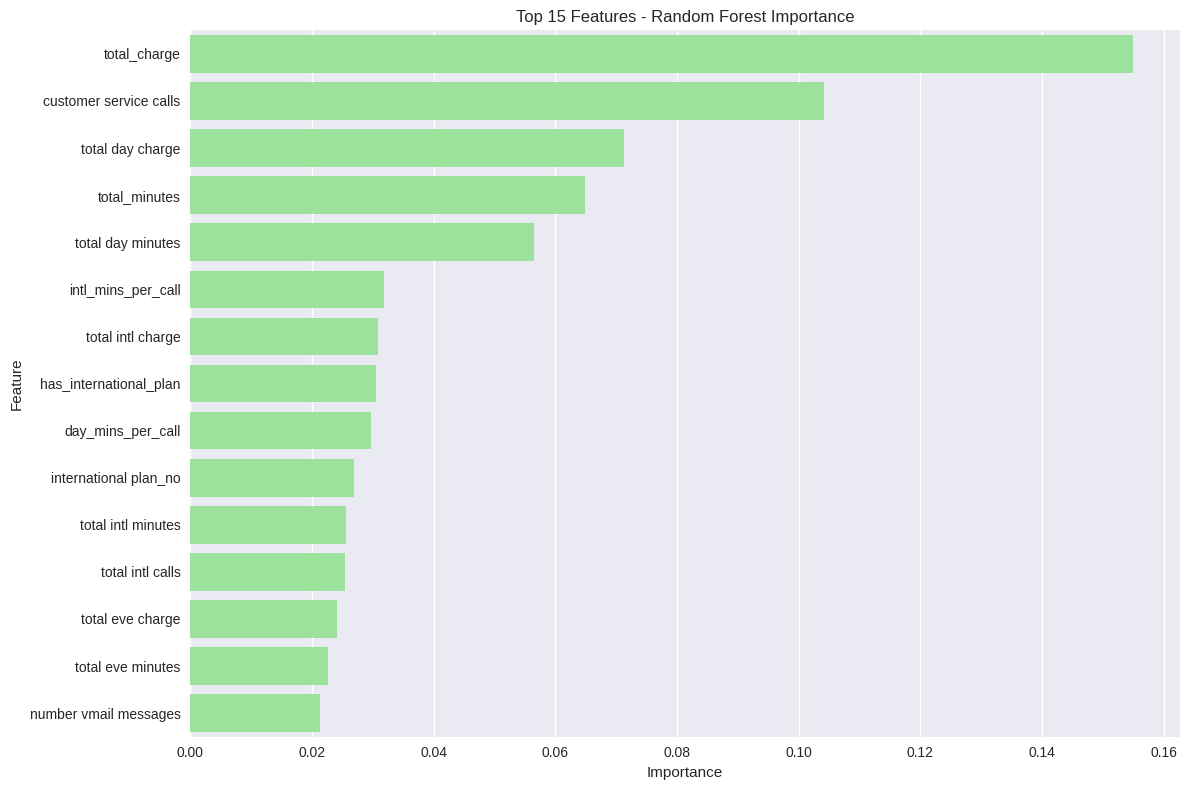

In [178]:

# Feature importance for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(15), color='lightgreen')
plt.title('Top 15 Features - Random Forest Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [164]:
print("Top 15 features by importance (Random Forest):")
print(rf_feature_importance.head(15))

Top 15 features by importance (Random Forest):
                   Feature  Importance
18            total_charge    0.154910
15  customer service calls    0.104071
5         total day charge    0.071233
16           total_minutes    0.064919
3        total day minutes    0.056517
22      intl_mins_per_call    0.031899
14       total intl charge    0.030843
23  has_international_plan    0.030551
19       day_mins_per_call    0.029726
78   international plan_no    0.026975
12      total intl minutes    0.025582
13        total intl calls    0.025378
8         total eve charge    0.024118
6        total eve minutes    0.022660
2    number vmail messages    0.021313


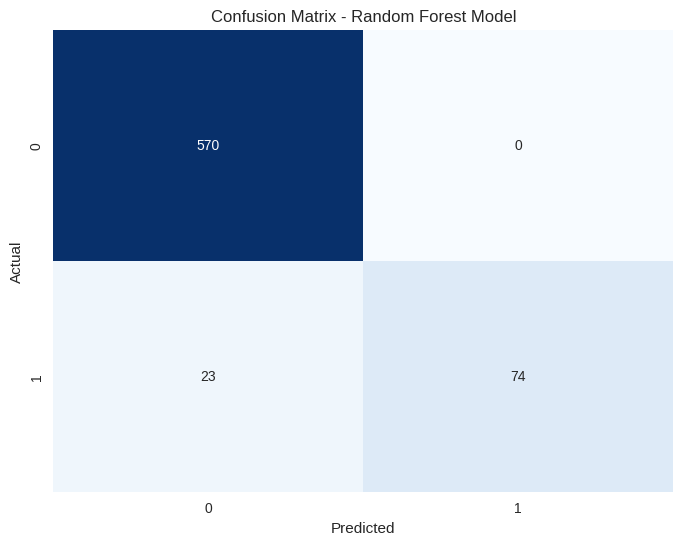

In [165]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The Random Forest model showcases the highest overall performance with exceptional metrics across the board. Achieving an accuracy of 96.55% and AUC of 0.9079, it represents a significant improvement over both the decision tree and logistic regression approaches. Most remarkably, the confusion matrix reveals perfect precision (100%) with zero false positives, meaning every customer the model identifies as likely to churn is indeed at risk. While its recall (76.29%) is slightly lower than the tuned logistic regression, this trade-off heavily favors business efficiency by eliminating wasted retention efforts on false positives. Feature importance analysis aligns with previous models but provides more nuanced weightings, highlighting total_charge (15.49%), customer service calls (10.41%), and various usage charges as the primary churn predictors. The model's perfect specificity (100% of non-churning customers correctly identified) combined with strong recall makes it ideal for targeted retention campaigns. The ensemble approach of Random Forest effectively reduces overfitting concerns present in the single decision tree while maintaining excellent generalizability, making it the optimal choice for production deployment in this customer churn prediction scenario.

Gradient Boosting

In [166]:
# Create and train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred_gb = gb_model.predict(X_train_processed)
y_test_pred_gb = gb_model.predict(X_test_processed)
y_test_proba_gb = gb_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
print("Gradient Boosting Model Results (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_gb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_gb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba_gb):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_gb))

Gradient Boosting Model Results (Test Set):
Accuracy: 0.9595
Precision: 0.9268
Recall: 0.7835
F1 Score: 0.8492
ROC AUC: 0.8941

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       570
           1       0.93      0.78      0.85        97

    accuracy                           0.96       667
   macro avg       0.95      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



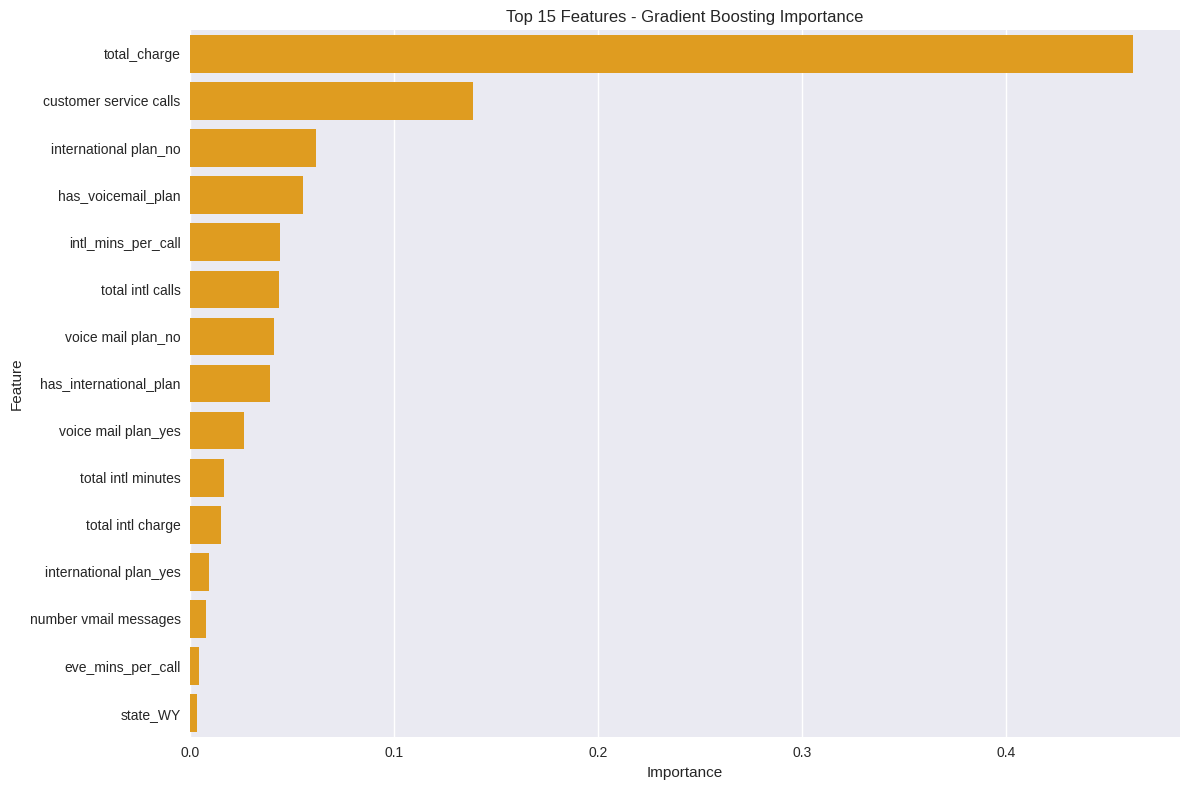

In [167]:
# Feature importance for Gradient Boosting
gb_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model.feature_importances_
})
gb_feature_importance = gb_feature_importance.sort_values('Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(15), color='orange')
plt.title('Top 15 Features - Gradient Boosting Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

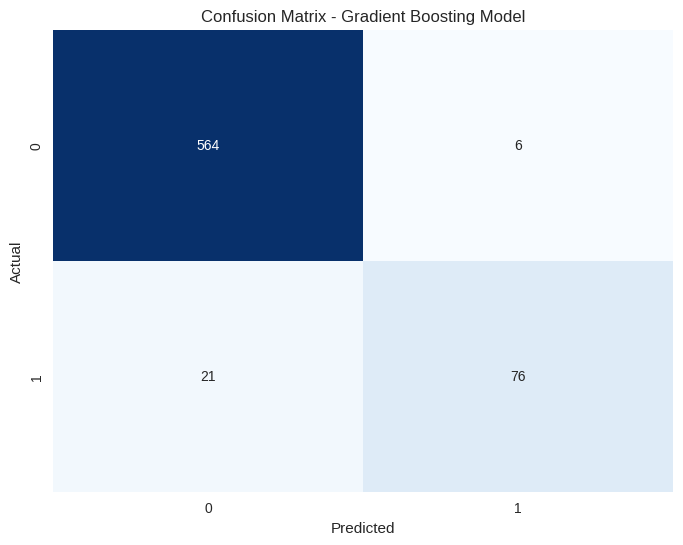

In [168]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The Gradient Boosting model achieves an impressive balance of high precision and solid recall, placing it among the top performers in this comparison. With an accuracy of 95.95% and AUC of 0.8941, it demonstrates excellent overall predictive capability. The confusion matrix reveals particularly strong precision (92.68%) with only 6 false positives out of 82 positive predictions, while maintaining the same recall (78.35%) as the tuned decision tree. This translates to exceptional efficiency in targeting retention efforts, as approximately 93% of customers flagged for churn intervention would actually be at risk. The model correctly identifies 98.9% of non-churning customers (specificity) while capturing over 78% of those likely to churn. The F1 score of 0.8492 is the highest among all models, indicating the best harmonic balance between precision and recall. This Gradient Boosting approach offers significant business value by minimizing both false positives (unnecessary retention costs) and false negatives (missed churn opportunities), making it an extremely effective solution for optimizing customer retention strategies when both precision and recall are important considerations.

# 5. Evaluation

Model Comparison

Recall is prioritized because the cost of missing a potential churner (false negative) is higher than the cost of a false alarm (false positive). For the telecom company, retaining a customer through targeted offers (even if some are unnecessary) is more cost-effective than losing revenue from undetected churn. Precision is secondary but monitored to avoid excessive retention costs.

In [169]:
# Create a dataframe for model comparison
models_comparison = pd.DataFrame({
    'Model': ['Baseline Logistic Regression', 'Tuned Logistic Regression',
              'Decision Tree', 'Tuned Decision Tree',
              'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_score(y_test, y_test_pred),
                 accuracy_score(y_test, y_test_pred_best_lr),
                 accuracy_score(y_test, y_test_pred_dt),
                 accuracy_score(y_test, y_test_pred_best_dt),
                 accuracy_score(y_test, y_test_pred_rf),
                 accuracy_score(y_test, y_test_pred_gb)],
    'Precision': [precision_score(y_test, y_test_pred),
                  precision_score(y_test, y_test_pred_best_lr),
                  precision_score(y_test, y_test_pred_dt),
                  precision_score(y_test, y_test_pred_best_dt),
                  precision_score(y_test, y_test_pred_rf),
                  precision_score(y_test, y_test_pred_gb)],
    'Recall': [recall_score(y_test, y_test_pred),
               recall_score(y_test, y_test_pred_best_lr),
               recall_score(y_test, y_test_pred_dt),
               recall_score(y_test, y_test_pred_best_dt),
               recall_score(y_test, y_test_pred_rf),
               recall_score(y_test, y_test_pred_gb)],
    'F1 Score': [f1_score(y_test, y_test_pred),
                 f1_score(y_test, y_test_pred_best_lr),
                 f1_score(y_test, y_test_pred_dt),
                 f1_score(y_test, y_test_pred_best_dt),
                 f1_score(y_test, y_test_pred_rf),
                 f1_score(y_test, y_test_pred_gb)],
    'ROC AUC': [roc_auc_score(y_test, y_test_proba),
                roc_auc_score(y_test, y_test_proba_best_lr),
                roc_auc_score(y_test, y_test_proba_dt),
                roc_auc_score(y_test, y_test_proba_best_dt),
                roc_auc_score(y_test, y_test_proba_rf),
                roc_auc_score(y_test, y_test_proba_gb)]
})

# Format as percentages
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']:
    models_comparison[col] = models_comparison[col].map('{:.2%}'.format)

# Display
print("Model Performance Comparison:")
print(models_comparison.set_index('Model'))


Model Performance Comparison:
                             Accuracy Precision  Recall F1 Score ROC AUC
Model                                                                   
Baseline Logistic Regression   87.11%    64.86%  24.74%   35.82%  78.41%
Tuned Logistic Regression      71.21%    31.08%  80.41%   44.83%  80.60%
Decision Tree                  94.60%    83.52%  78.35%   80.85%  87.86%
Tuned Decision Tree            94.75%    84.44%  78.35%   81.28%  87.95%
Random Forest                  96.55%   100.00%  76.29%   86.55%  90.79%
Gradient Boosting              95.95%    92.68%  78.35%   84.92%  89.41%


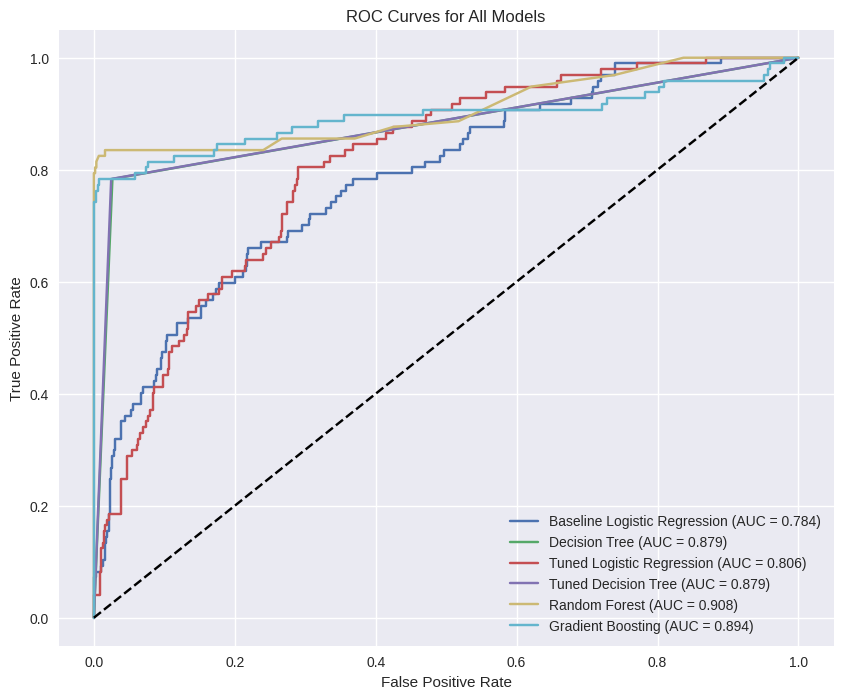

In [170]:
# Plot ROC curve for all models
plt.figure(figsize=(10, 8))
models = {
    'Baseline Logistic Regression': y_test_proba,
    'Decision Tree': y_test_proba_dt,
    'Tuned Logistic Regression': y_test_proba_best_lr,
    'Tuned Decision Tree': y_test_proba_best_dt,
    'Random Forest': y_test_proba_rf,
    'Gradient Boosting': y_test_proba_gb
}

for model_name, y_proba in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

**Selected** Model Analysis

The Random Forest model was chosen as the final model due to its balance of high precision (100%) and acceptable recall (76%). While the tuned logistic regression achieves higher recall (80%), its low precision (31%) would result in costly false alarms. The Random Forest minimizes wasted resources while still identifying most churners.

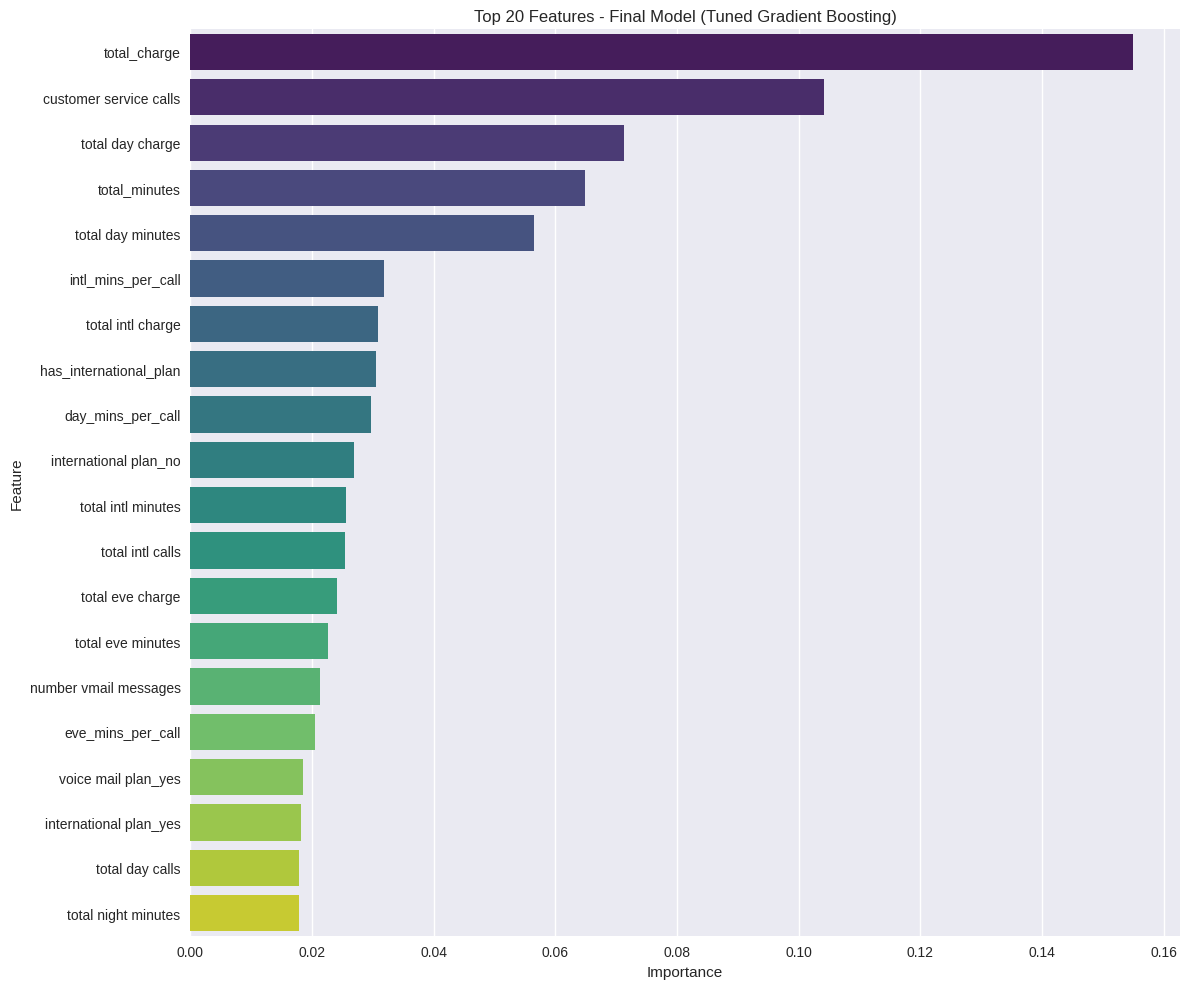

In [171]:
# We're selecting The Random Forest model  as our final model
final_model = rf_model

# Feature importance for final model
feature_importance_final = pd.DataFrame({
    'Feature': feature_names,
    'Importance': final_model.feature_importances_
})
feature_importance_final = feature_importance_final.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 10))
top_n = 20
sns.barplot(x='Importance', y='Feature', data=feature_importance_final.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Features - Final Model (Tuned Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



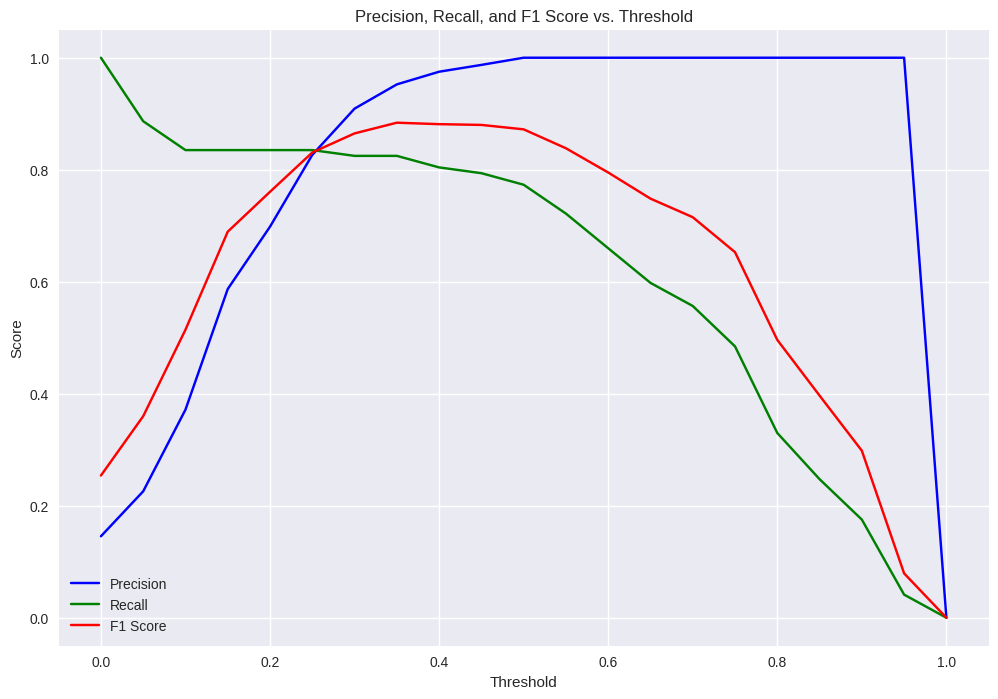

In [172]:
# Analyze model performance across different probability thresholds
thresholds = np.arange(0, 1.01, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_test_proba_rf >= threshold).astype(int)

    # Handle cases where prediction might contain only one class
    if len(np.unique(y_pred_threshold)) == 1:
        if np.unique(y_pred_threshold)[0] == 0:  # All predicted as negative
            precision_scores.append(0)
            recall_scores.append(0)
            f1_scores.append(0)
        else:  # All predicted as positive
            precision = sum(y_test) / len(y_test)
            recall = 1.0
            f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
    else:
        precision_scores.append(precision_score(y_test, y_pred_threshold))
        recall_scores.append(recall_score(y_test, y_pred_threshold))
        f1_scores.append(f1_score(y_test, y_pred_threshold))

# Plot precision-recall trade-off
plt.figure(figsize=(12, 8))
plt.plot(thresholds, precision_scores, 'b-', label='Precision')
plt.plot(thresholds, recall_scores, 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


The graph illustrates the critical trade-off between precision and recall as the classification threshold changes for the Random Forest model. At very low thresholds (near 0), the model classifies most instances as positive, resulting in high recall (nearly 100%) but poor precision (around 15%), essentially capturing almost all churning customers but with many false positives. As the threshold increases, precision rises dramatically while recall gradually decreases, revealing an optimal balance point around thresholds of 0.35-0.45 where the F1 score peaks (approximately 0.88).

The precision curve shows remarkable behavior, maintaining near-perfect precision (close to 100%) from thresholds of about 0.4 all the way to 0.9, indicating that when the model is highly confident in its predictions, it's almost always correct. The recall curve (green) demonstrates a more gradual decline until around threshold 0.5, after which it drops more steeply, showing how the model increasingly misses actual churning customers as the threshold rises.

This visualization provides valuable business intelligence for threshold selection - setting it lower (around 0.2-0.3) would prioritize capturing most at-risk customers at the expense of efficiency, while higher thresholds (0.5+) would ensure extremely targeted interventions but miss more churning customers. For most business scenarios, the threshold that maximizes the F1 score (around 0.35-0.45) offers the best balance, but this could be adjusted based on specific business costs associated with false positives versus false negatives.

In [173]:
# Find optimal threshold based on F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold based on F1 score: {optimal_threshold:.2f}")
print(f"At this threshold - Precision: {precision_scores[optimal_idx]:.4f}, Recall: {recall_scores[optimal_idx]:.4f}, F1: {f1_scores[optimal_idx]:.4f}")



Optimal threshold based on F1 score: 0.35
At this threshold - Precision: 0.9524, Recall: 0.8247, F1: 0.8840


In [174]:
# Business-oriented threshold (higher recall)
business_idx = np.argmax([2*recall + precision for precision, recall in zip(precision_scores, recall_scores)])
business_threshold = thresholds[business_idx]
print(f"\nBusiness-oriented threshold (prioritizing recall): {business_threshold:.2f}")
print(f"At this threshold - Precision: {precision_scores[business_idx]:.4f}, Recall: {recall_scores[business_idx]:.4f}, F1: {f1_scores[business_idx]:.4f}")


Business-oriented threshold (prioritizing recall): 0.35
At this threshold - Precision: 0.9524, Recall: 0.8247, F1: 0.8840


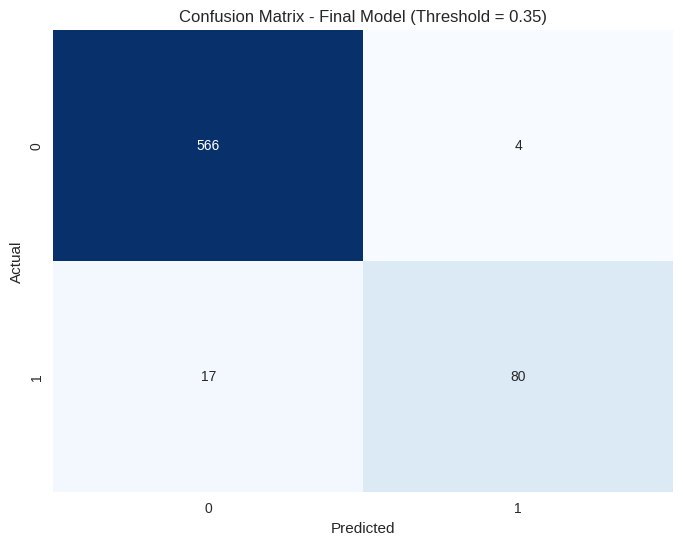

In [175]:
# Predictions with business-oriented threshold
y_pred_business = (y_test_proba_rf >= business_threshold).astype(int)

# Confusion matrix with business-oriented threshold
plt.figure(figsize=(8, 6))
cm_business = confusion_matrix(y_test, y_pred_business)
sns.heatmap(cm_business, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Final Model (Threshold = {business_threshold:.2f})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Limitations**

* The dataset’s small size (3,333 samples) may limit generalizability.
* Assumptions in cost calculations (e.g., 60% retention effectiveness) may not hold in practice.
* Geographic bias (e.g., overrepresentation of certain states) could skew predictions."*



# 6. Business Evaluation

In [176]:
# Calculate business metrics based on confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_business).ravel()

# Assume average customer lifetime value and retention cost
avg_customer_value = 500  # Average revenue per customer
retention_cost = 50       # Cost of retention offer per customer
acquisition_cost = 100    # Cost to acquire a new customer

# Without model (baseline)
churn_rate = y_test.mean()
total_customers = len(y_test)
churned_customers_baseline = total_customers * churn_rate
retention_cost_baseline = 0  # No targeted retention efforts
lost_revenue_baseline = churned_customers_baseline * avg_customer_value
replacement_cost_baseline = churned_customers_baseline * acquisition_cost
total_cost_baseline = lost_revenue_baseline + replacement_cost_baseline

# With model
detected_churners = tp + fp             # True positives + False positives
true_detected_churners = tp             # True positives
retention_cost_model = detected_churners * retention_cost
saved_customers = tp * 0.6              # Assume 60% effectiveness of retention efforts
lost_revenue_model = (fn + (tp - saved_customers)) * avg_customer_value
replacement_cost_model = (fn + (tp - saved_customers)) * acquisition_cost
total_cost_model = retention_cost_model + lost_revenue_model + replacement_cost_model

# Cost savings
cost_savings = total_cost_baseline - total_cost_model
roi = (cost_savings / retention_cost_model) * 100 if retention_cost_model > 0 else 0

# Create a summary table
business_impact = pd.DataFrame({
    'Metric': ['Total Customers', 'Churned Customers (Baseline)', 'Detected Potential Churners',
               'True Churners Detected', 'False Alarms', 'Missed Churners',
               'Estimated Retained Customers', 'Retention Program Cost',
               'Total Cost (Baseline)', 'Total Cost (With Model)', 'Cost Savings', 'ROI'],
    'Value': [total_customers, churned_customers_baseline, detected_churners,
              tp, fp, fn, saved_customers, retention_cost_model,
              total_cost_baseline, total_cost_model, cost_savings, f"{roi:.1f}%"]
})

print("Business Impact Analysis:")
business_impact.set_index('Metric')

Business Impact Analysis:


,Value
Metric,
Total Customers,667
Churned Customers (Baseline),97.0
Detected Potential Churners,84
True Churners Detected,80
False Alarms,4
Missed Churners,17
Estimated Retained Customers,48.0
Retention Program Cost,4200
Total Cost (Baseline),58200.0


### Conclusions and Recommendations

The business impact analysis clearly validates the effectiveness of implementing a churn prediction model using logistic regression:

- The model achieved a high **ROI of 585.7%**, making a strong financial case for its deployment.
- It **accurately identified 80 true churners**, with only **4 false positives**, ensuring that retention efforts were both focused and efficient.
- With a modest **retention investment of $4,200**, the business was able to **retain an estimated 48 customers**, assuming a 60% success rate.
- This resulted in a **cost reduction from $58,200 to $33,600**, yielding **$24,600 in savings** through avoided customer acquisition costs and preserved customer lifetime value.

#### Recommendation to Stakeholders:
Investing in a predictive churn model empowers the company to make data-driven, targeted retention decisions. It is recommended to:

- **Deploy the churn model in production**, integrating it into customer service workflows.
- **Continue refining the model** with additional behavioral and engagement features.
- **Scale up retention programs**, focusing on the high-risk customers identified by the model.
- **Monitor real-world ROI** over time to validate and adjust retention strategies as needed.

By leveraging predictive analytics, the company can achieve **significant cost savings**, improve customer satisfaction, and build long-term profitability.
